# Projeto de Eletromagnetismo #

### Wireless Power Transfer  

Este projeto objetiva simular e montar um sistema de transmissão de energia pelo ar, alimentando uma carga a uma distância considerável, de acordo com as simulações.

Este Jupyter em específico, contém simulações correlacionadas a adequação de parâmetros para o experimento.

### Autores:
- Letícia Côelho;
- Lorran Caetano;
- Matheus Silva;
- Nívea Abreu

### Professores:
- Carlos Marmo;
- Fábio El Hage;
- Rodrigo Carareto;
- Gabriel Pereira


# Importação de bibliotecas

In [1]:
#Vamos importar os módulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

# Circuito a ser simulado
<img src ='circuito.jfif' width='600'>

# Adequação de parâmetros

Nesta seção, escolheu-se parâmetros considerados adequados para realização da simulação. Estes foram iterados de acordo com necessidade do experimento.

$$ U_{fonte}=10/\Pi V $$ 
$$L_{bobina}=185,2.10^{-6}H$$
$$R_{bobina}=1,2\Omega$$
$$C_{1}=C_{2}=0,1.10^{-6}$$
$$R_{carga}=400\Omega$$

Ademais, foram simulados faixas de valores de frequências de oscilação e valores de fatores de acoplamento (K), para melhor entendimento simulacional.

Nesta seção também foram obtidos, o valor de frequência de ressonância entre a Indutância da Bobina e dos capacitores, estimada em:
$$F_{ressonância}=36982.79Hz$$

In [2]:
#Tensão da fonte (pico)
Ufonte=2*5/np.pi
#Indutâncias 
L=185.2e-6
#Resistências
R=1.2 *1.1
#Capacitâncias
C = 0.1e-6
# Resistência da carga:
Rc= 400

# Lista possíveis frequências
listaf = np.arange(10,100e3,10)
# Lista de possíveis K:
listak = np.linspace(0.085,0.15,10)

# Valores esperados:
w = 1/(math.sqrt(L*C))
f_referencia = w/(2*math.pi)

print(f'Valor de referencia para frequência de ressonância:{f_referencia}')

Valor de referencia para frequência de ressonância:36982.78736178057


# Definição da função de cálculo do transformador
Utilizando algébra linear, determina-se a função que recebendo certos parâmetros de entrada estabelecidos anteriormente, irá calcular, corrente no circuito primário, corrente no secundário, corrente na carga e tensão na carga.

In [3]:
def CalcularTransformador(Uf, Rc, XM, XC, XL):
    
    # Reatancia equivalente
    Xeq = (Rc*XC/(Rc+XC))
    
    Z=np.array([[R+XL+XC, -XM],[-XM, Xeq+R+XL]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    i1 =  i[0]
    i2 =  i[1]
    
    # Ddp e corrente na carga
    V2 = Xeq*i2
    icarga = V2/Rc
    
    return i1, i2, icarga , V2

# Simulação da corrente de carga esperada
De acordo com variação simultânea de de diferentes valroes de acoplamento e de frequência de ressonância, procura-se estimar a corrente em relação a estes parâmetros que se sejam adequados ao valores esperado aos parâmetros estabelecidos.

Maior valor de i = 0.059 com k = 0.085
Maior valor de i = 0.057 com k = 0.092
Maior valor de i = 0.056 com k = 0.099
Maior valor de i = 0.055 com k = 0.107
Maior valor de i = 0.054 com k = 0.114
Maior valor de i = 0.053 com k = 0.121
Maior valor de i = 0.052 com k = 0.128
Maior valor de i = 0.052 com k = 0.136
Maior valor de i = 0.051 com k = 0.143
Maior valor de i = 0.051 com k = 0.15


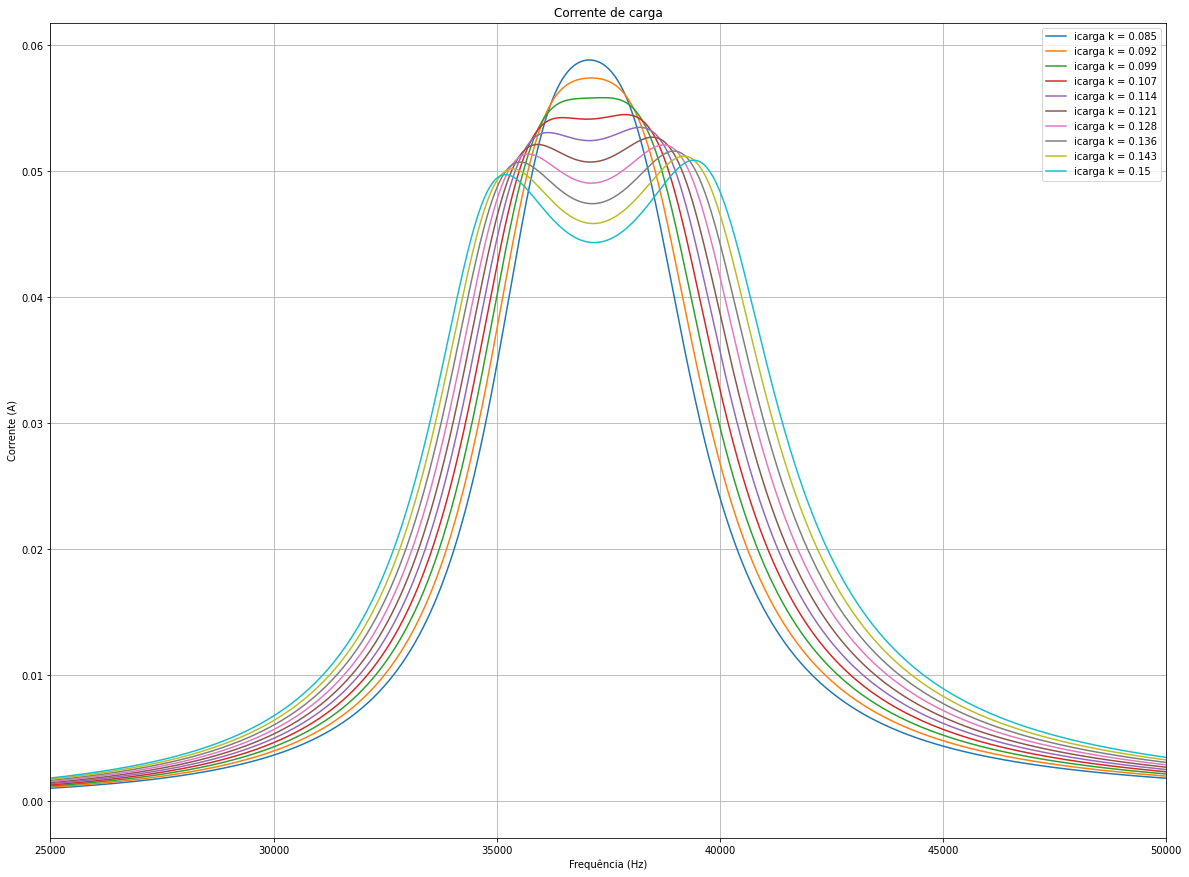

<Figure size 432x288 with 0 Axes>

In [4]:
listaV2= []

plt.figure(figsize=(20,15))

for k in listak:
    listai1= []
    listai2= []
    listaicarga = []
    for f in listaf:
        
        # Calculando w e indutância:
        w = 2*math.pi*f
        M = k*sqrt(L*L)
        
        # Calculando reatâncias:
        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L
        
        # Correntes e ddp na carga
        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai1.append(np.abs(i1))
        listai2.append(np.abs(i2))
        listaicarga.append(np.abs(icarga))
        
    icaraga_max = max(np.abs(listaicarga))
    index = list(np.abs(listaicarga)).index(icaraga_max)
    print(f'Maior valor de i = {np.round(icaraga_max,3)} com k = {np.round(k, 3)}')
    
    plt.plot(listaf, listaicarga, label=f'icarga k = {np.round(k, 3)}')

plt.grid(True)
plt.legend()
plt.xlim(25000, 50000)
plt.ylabel("Corrente (A)")
plt.xlabel("Frequência (Hz)")
plt.title("Corrente de carga")
plt.show()
plt.savefig('Corrente de carga.png')

# Simulação das correntes no circuito primário e secundário
Variando vários valores de fator de acomplamento e de frequências, procura-se obter via simulação as correntes esperadas.

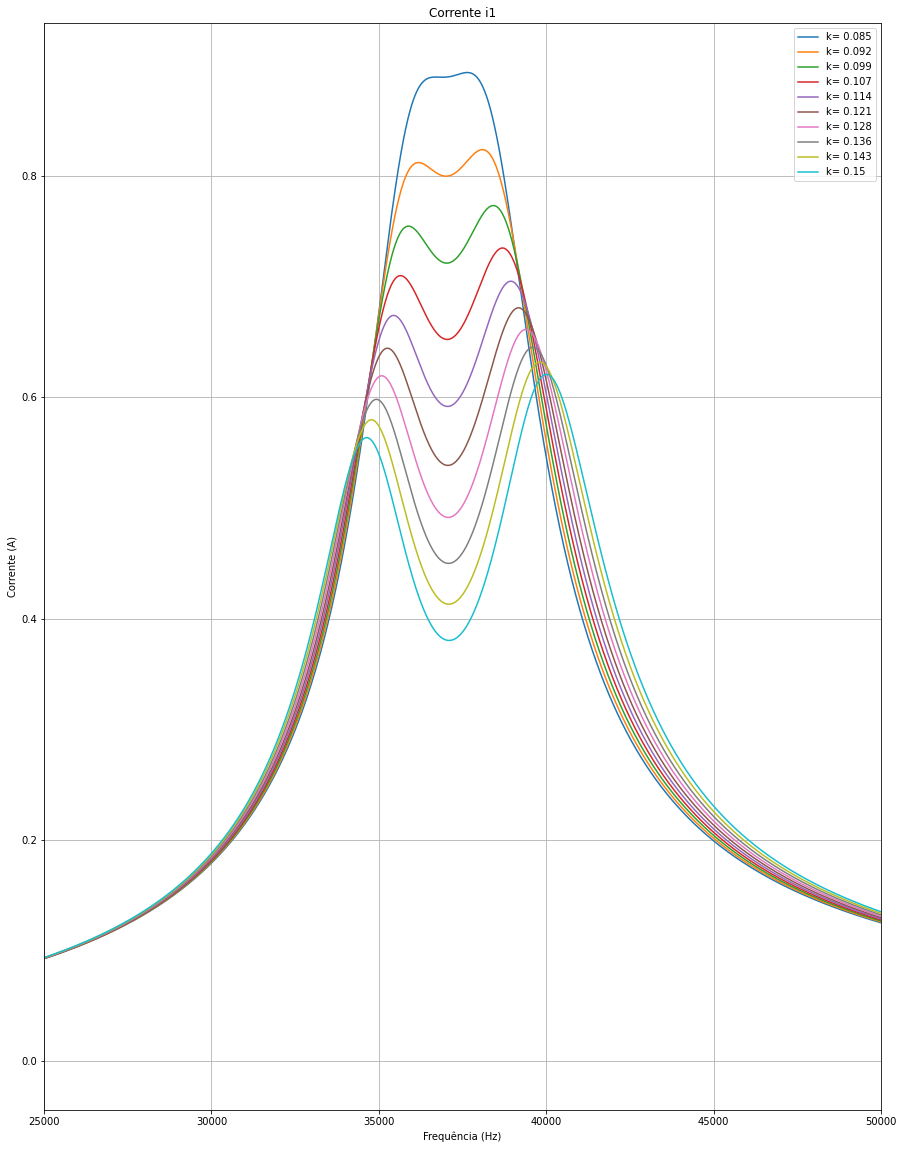

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(15,20))
for k in listak:
    listai1= []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai1.append(np.abs(i1))
    
    plt.plot(listaf, listai1, label=f'k= {np.round(k,3)}')
    
plt.grid(True)
plt.title("Corrente i1")
plt.ylabel("Corrente (A)")
plt.xlabel("Frequência (Hz)")
plt.xlim(25000, 50000)
plt.legend()
plt.show()    
plt.savefig('Corrente i1.png')

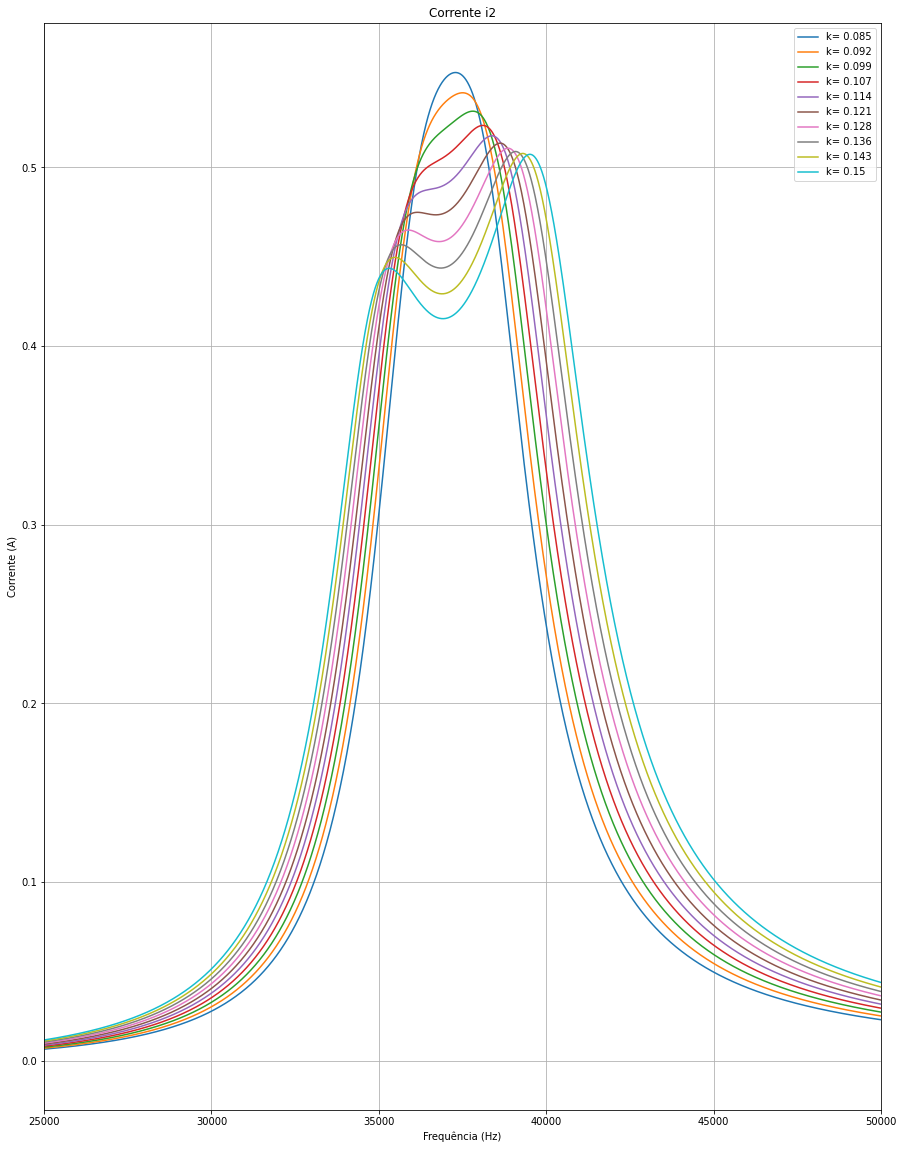

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(15,20))

for k in listak:
    listai1= []
    listai2= []
    listaicarga = []
    listaPot_entrada = []
    listaPot_saida = []
    listaGanho = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        listai2.append(np.abs(i2))    
    plt.plot(listaf, listai2, label=f'k= {np.round(k,3)}')

plt.title("Corrente i2")
plt.grid(True)
plt.ylabel("Corrente (A)")
plt.xlabel("Frequência (Hz)")
plt.xlim(25000,50000)
plt.legend()
plt.show()
plt.savefig('Corrente i2.png')

# Simulação das potências de entrada e saída no circuito
De acordo com os resultados anteriores, procura-se agora, com as mesmas faixas de variação de K e frequências, simular as potências de entrada e saída, para melhor entendimento da transmissão para com esses parâmetros.

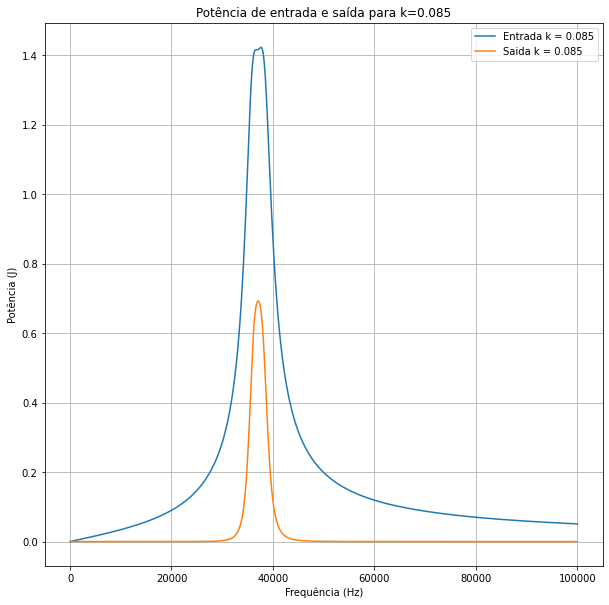

<Figure size 432x288 with 0 Axes>

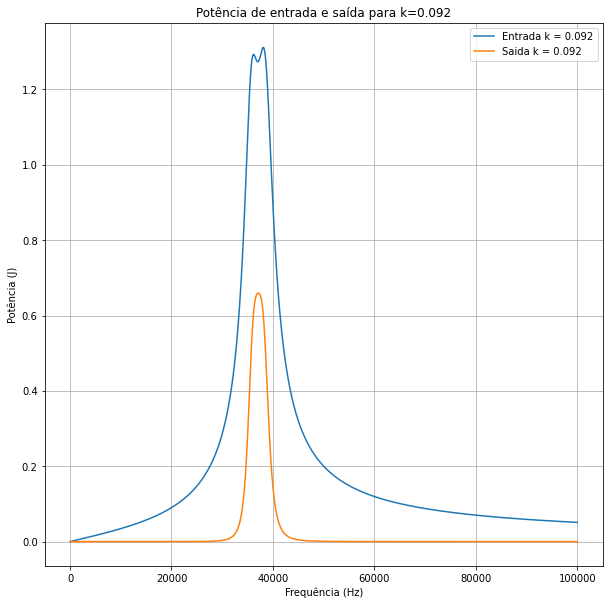

<Figure size 432x288 with 0 Axes>

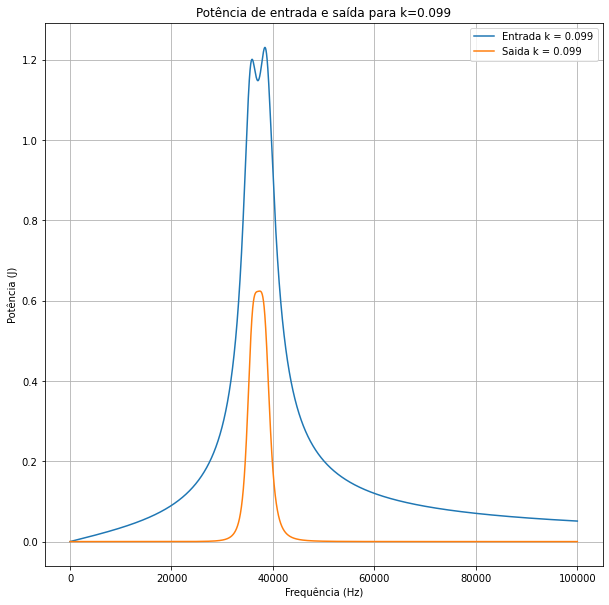

<Figure size 432x288 with 0 Axes>

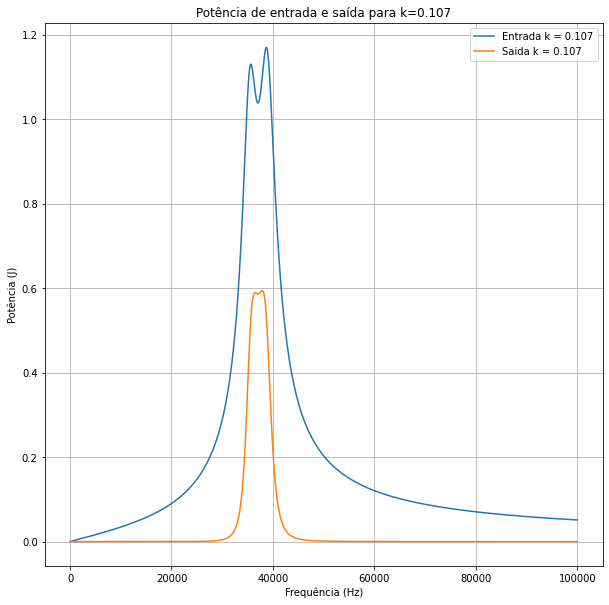

<Figure size 432x288 with 0 Axes>

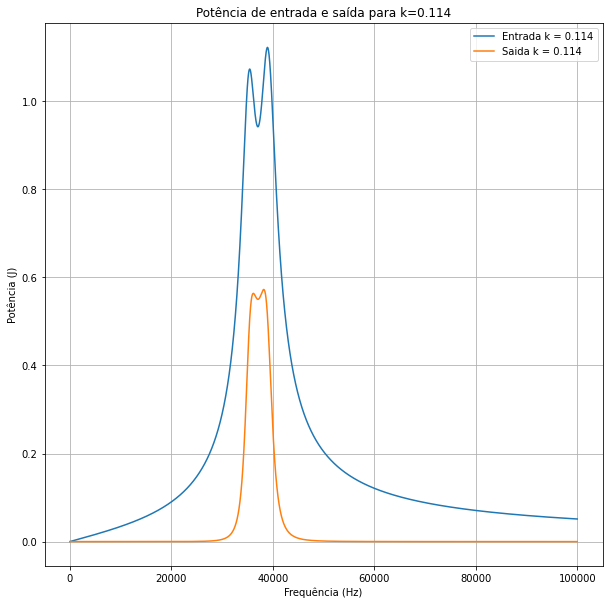

<Figure size 432x288 with 0 Axes>

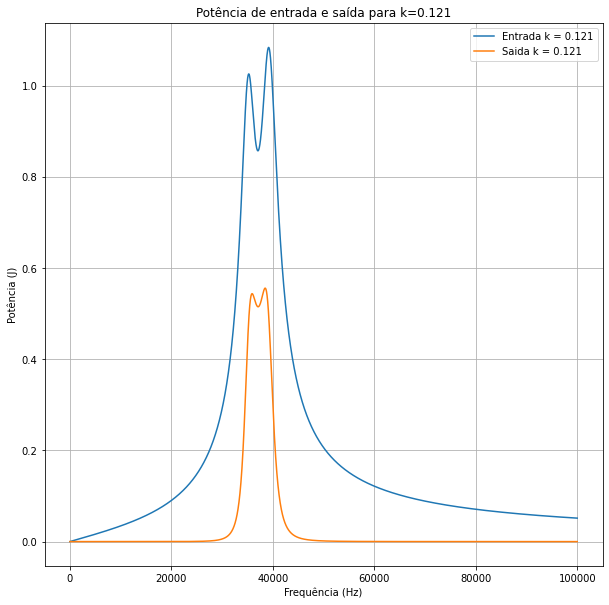

<Figure size 432x288 with 0 Axes>

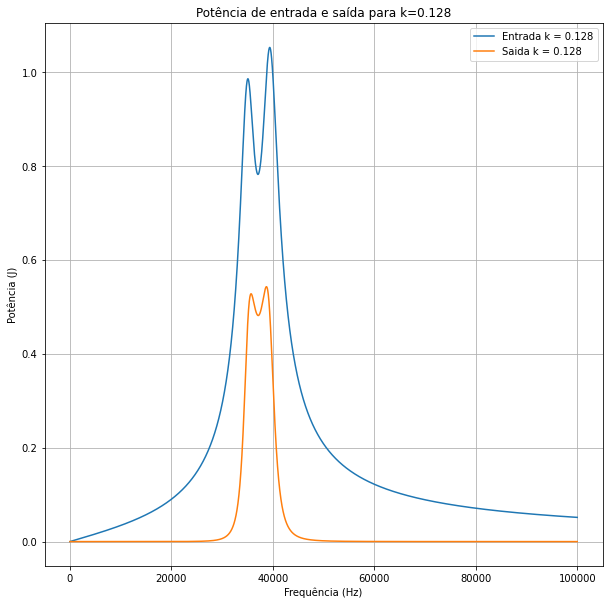

<Figure size 432x288 with 0 Axes>

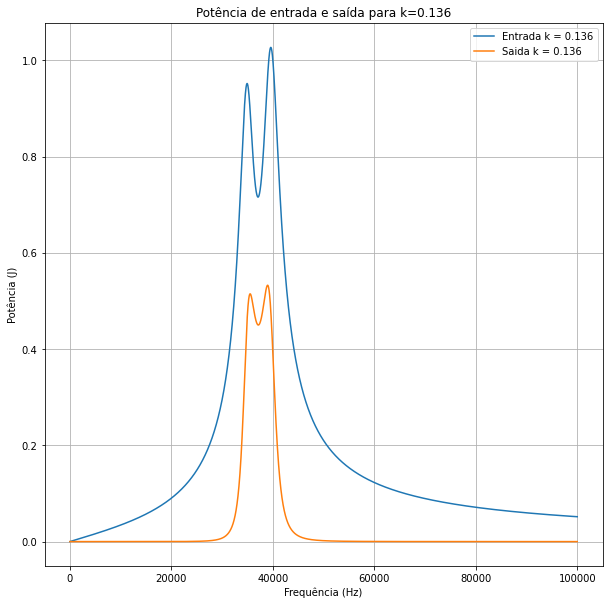

<Figure size 432x288 with 0 Axes>

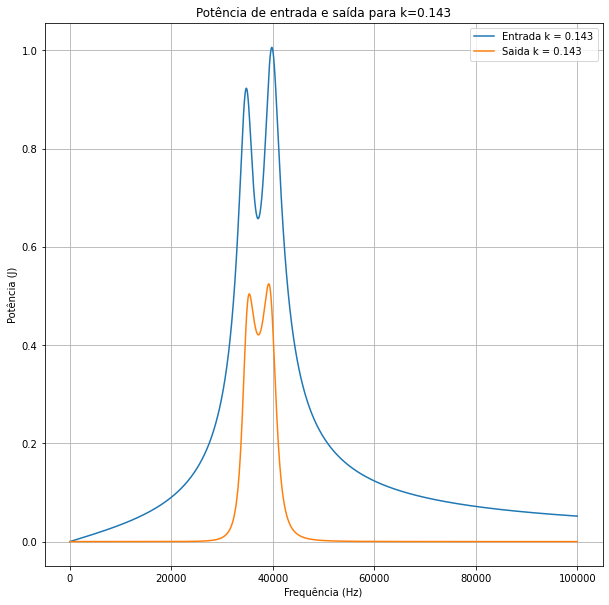

<Figure size 432x288 with 0 Axes>

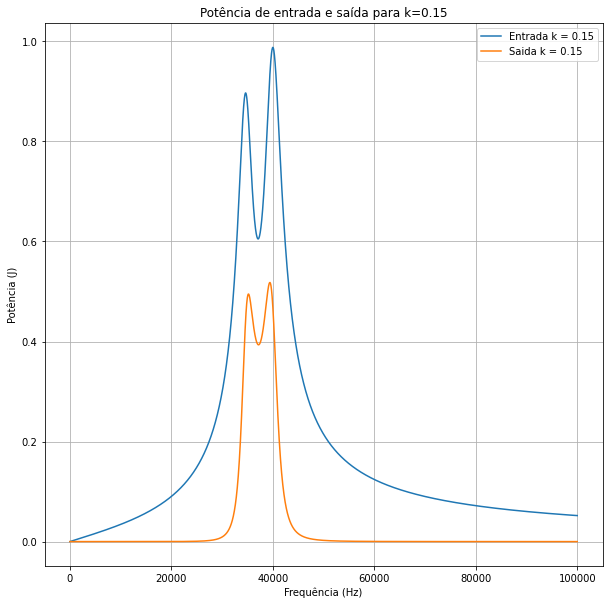

<Figure size 432x288 with 0 Axes>

In [7]:
for k in listak:
    listaPot_entrada = []
    listaPot_saida = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaPot_saida.append(abs(S2))
        listaPot_entrada.append(abs(S1))
    plt.figure(figsize=(10,10))
    plt.title(f"Potência de entrada e saída para k={np.round(k,3)}")
    plt.plot(listaf, listaPot_entrada, label=f'Entrada k = {np.round(k,3)}')
    plt.plot(listaf, listaPot_saida, label=f'Saida k = {np.round(k,3)}')
    plt.ylabel("Potência (J)")
    plt.xlabel("Frequência (Hz)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.savefig(f'Potência para k={np.round(k,3)}.png')

# Estimando o ganho entre as malhas variando os parâmetros
Baseado nos gráficos anteriores, estimou-se também o ganho total do circuito, buscando entender melhorias experimentais a serem tomadas, tal qual verificação da frequência esperada.

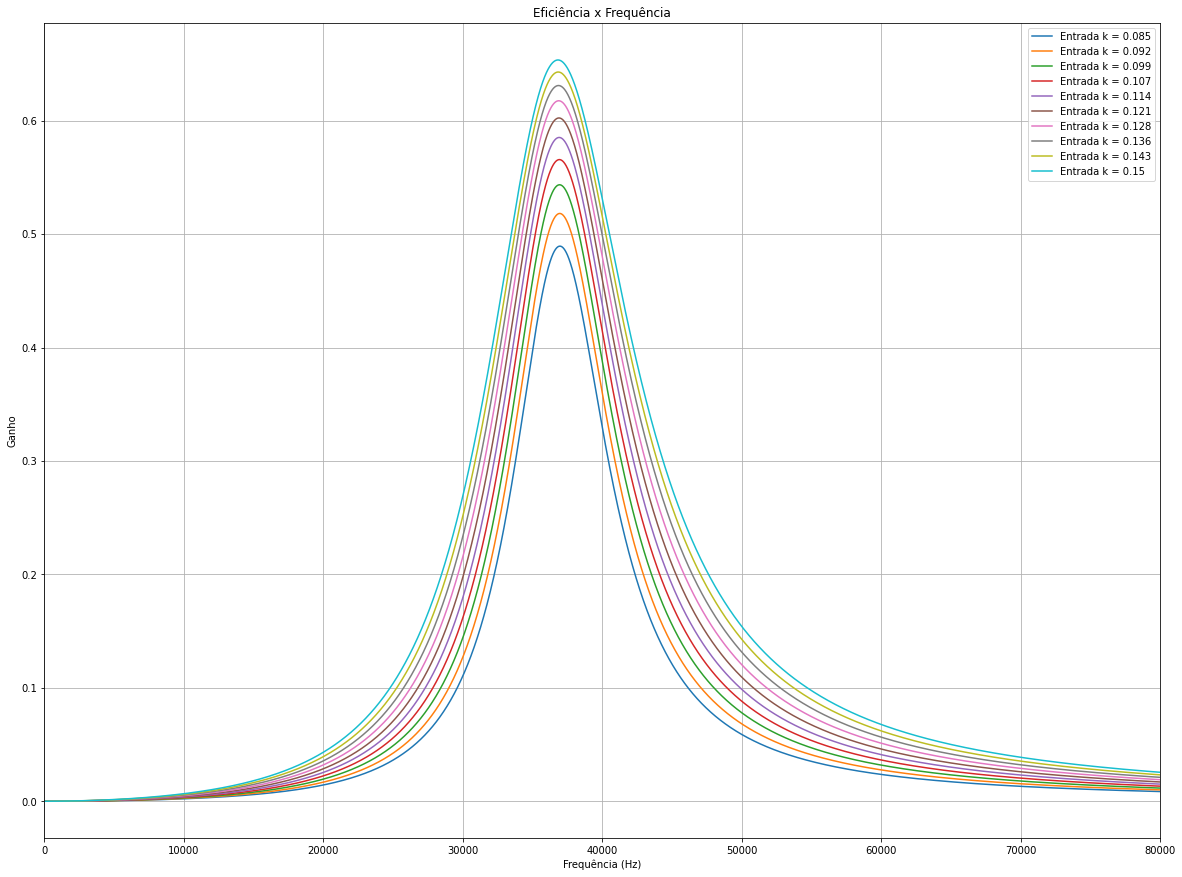

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(20,15))
for k in listak:
    listaGanho = []
    for f in listaf:

        w = 2*math.pi*f
        M = k*sqrt(L*L)

        XM=1j*w*M
        XC = 1/(w*C*1j)
        XL = 1j*w*L

        i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)

        # Potencia:
        S2=V_carga/sqrt(2)*icarga.conjugate()/sqrt(2)
        S1=Ufonte/sqrt(2)*i1.conjugate()/sqrt(2)
        
        listaGanho.append(S2.real/S1.real)
    
    plt.plot(listaf, listaGanho, label=f'Entrada k = {np.round(k,3)}')
    plt.legend()

plt.xlim(0,80000)
plt.ylabel("Ganho")
plt.xlabel("Frequência (Hz)")
plt.title("Eficiência x Frequência")
plt.grid(True)
plt.show()
plt.savefig('Eficiência x Frequência.png')

# Construindo um gráfico que relacione o valor de pico da tensão no secundário com o coeficiente de acoplamento k
Após entendimento da frequência de ressonância adequada ao esperado, declarada em sessões anteriores, procurou-se entender os valores de picos no circuito secundário em relação ao valor de acoplamento em variação, que terá uma relação com a distância entre bobinas no experimento.

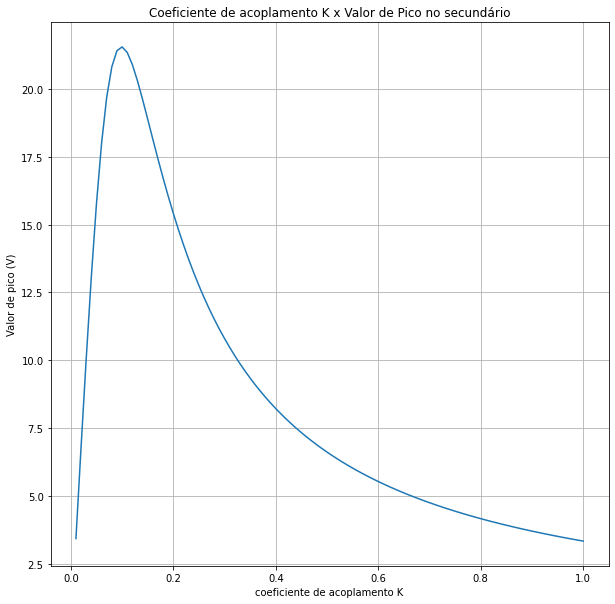

<Figure size 432x288 with 0 Axes>

In [9]:
listaV2= []
listak = np.linspace(0.01,1,100)

Rc=400
f = 36000
for k in listak:    
    w = 2*math.pi*f
    M = k*sqrt(L*L)

    XM=1j*w*M
    XC = 1/(w*C*1j)
    XL = 1j*w*L

    i1, i2, icarga , V_carga = CalcularTransformador(Ufonte, Rc, XM, XC, XL)
    listaV2.append(np.abs(V_carga))

plt.figure(figsize=(10,10))
plt.title("Coeficiente de acoplamento K x Valor de Pico no secundário")
plt.xlabel("coeficiente de acoplamento K")
plt.ylabel("Valor de pico (V)")
plt.plot(listak, listaV2)
plt.grid(True)
plt.show()
plt.savefig('Coeficiente de acoplamento K x Pico.png')

# Utilizando valores experimentais de laboratório e comparando com simulados
Em laboratório foram estimados valores de distância entre bobinas x Valores de tensão de pico no secundário.

De posso desses valores, compara-se tais faixas para melhor compreensão entre o coeficiente de acoplamento x Distância, tal qual a validação da simulação versus ao obtido experimentalmente.

In [10]:
#Dados para comparação dos dados obtidos
print(np.round(listaV2,1))
print(listak)

[ 3.4  6.8 10.  13.1 15.8 18.  19.7 20.8 21.4 21.6 21.3 20.9 20.3 19.6
 18.9 18.2 17.4 16.7 16.1 15.4 14.8 14.3 13.7 13.2 12.8 12.3 11.9 11.5
 11.1 10.8 10.5 10.2  9.9  9.6  9.3  9.1  8.9  8.6  8.4  8.2  8.   7.8
  7.7  7.5  7.3  7.2  7.   6.9  6.7  6.6  6.5  6.4  6.2  6.1  6.   5.9
  5.8  5.7  5.6  5.5  5.4  5.4  5.3  5.2  5.1  5.   5.   4.9  4.8  4.7
  4.7  4.6  4.6  4.5  4.4  4.4  4.3  4.3  4.2  4.2  4.1  4.1  4.   4.
  3.9  3.9  3.8  3.8  3.7  3.7  3.7  3.6  3.6  3.5  3.5  3.5  3.4  3.4
  3.4  3.3]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0

Colocando valores medidos em laboratório versus valores simulados.
Em laboratório foram obtidos 14 pontos de (distância, tensão de pico medida), comparando-se estes valores com os simulados anteriomente para melhor entendimento de K versus distância.

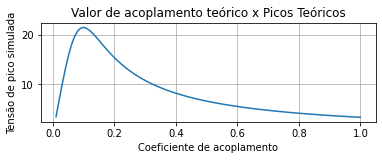

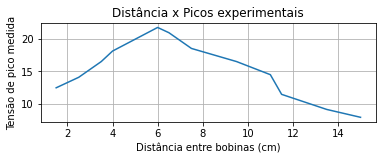

<Figure size 432x288 with 0 Axes>

In [11]:
listaK = [listak[25],listak[21],listak[17],listak[15],listak[7],listak[6],listak[5],listak[4],listak[3],listak[2],listak[1],
         listak[0]]
#Valores obtidos e medidos experimental em laboratório
distancias = [1.5,2.5,3.5,4,6,6.5,7.5,9.5,11,11.5,13.5,15] # em centímetros
picos_experimental = [12.5,14.1,16.5,18.1,21.7,20.9,18.5,16.5,14.5,11.5,9.2,8] # em Voltz

plt.subplot(2,1,1)
plt.plot(listak, listaV2)
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tensão de pico simulada")
plt.title("Valor de acoplamento teórico x Picos Teóricos")
plt.grid(True)
plt.show()
plt.savefig('Coeficiente de acoplamento K x Pico_final.png')

plt.subplot(2,1,2)
plt.plot(distancias, picos_experimental)
plt.xlabel("Distância entre bobinas (cm)")
plt.ylabel("Tensão de pico medida")
plt.title("Distância x Picos experimentais")
plt.grid(True)
plt.show()
plt.savefig('Distância x Picos experimentai.png')

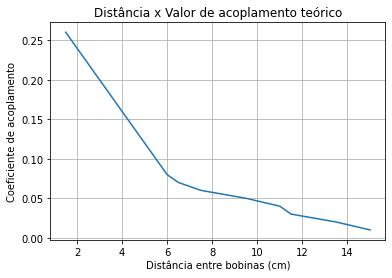

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(distancias, listaK)
plt.grid(True)
plt.xlabel("Distância entre bobinas (cm)")
plt.ylabel("Coeficiente de acoplamento")
plt.title("Distância x Valor de acoplamento teórico")
plt.show()
plt.savefig('Distância x Valor de acoplamento teóric.png')

# Conclusões
Percebe-se principalmente pelo último gráfico, e pelas conclusões obtidas em laboratório que tanto simulação quanto experimento, foram coerentes reciprocamente e corroboraram para resultados adequados do experimento.